In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format='retina'

In [21]:
data = pd.read_csv('https://github.com/prasertcbs/basic-dataset/raw/master/iris.csv')

In [22]:
data.sample(10)

,sepal_length,sepal_width,petal_length,petal_width,species
103,6.3,2.9,5.6,1.8,virginica
43,5.0,3.5,1.6,0.6,setosa
36,5.5,3.5,1.3,0.2,setosa
138,6.0,3.0,4.8,1.8,virginica
129,7.2,3.0,5.8,1.6,virginica
3,4.6,3.1,1.5,0.2,setosa
18,5.7,3.8,1.7,0.3,setosa
105,7.6,3.0,6.6,2.1,virginica
26,5.0,3.4,1.6,0.4,setosa
20,5.4,3.4,1.7,0.2,setosa


In [23]:
data.species.value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

In [24]:
data.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

<AxesSubplot:xlabel='petal_length', ylabel='petal_width'>

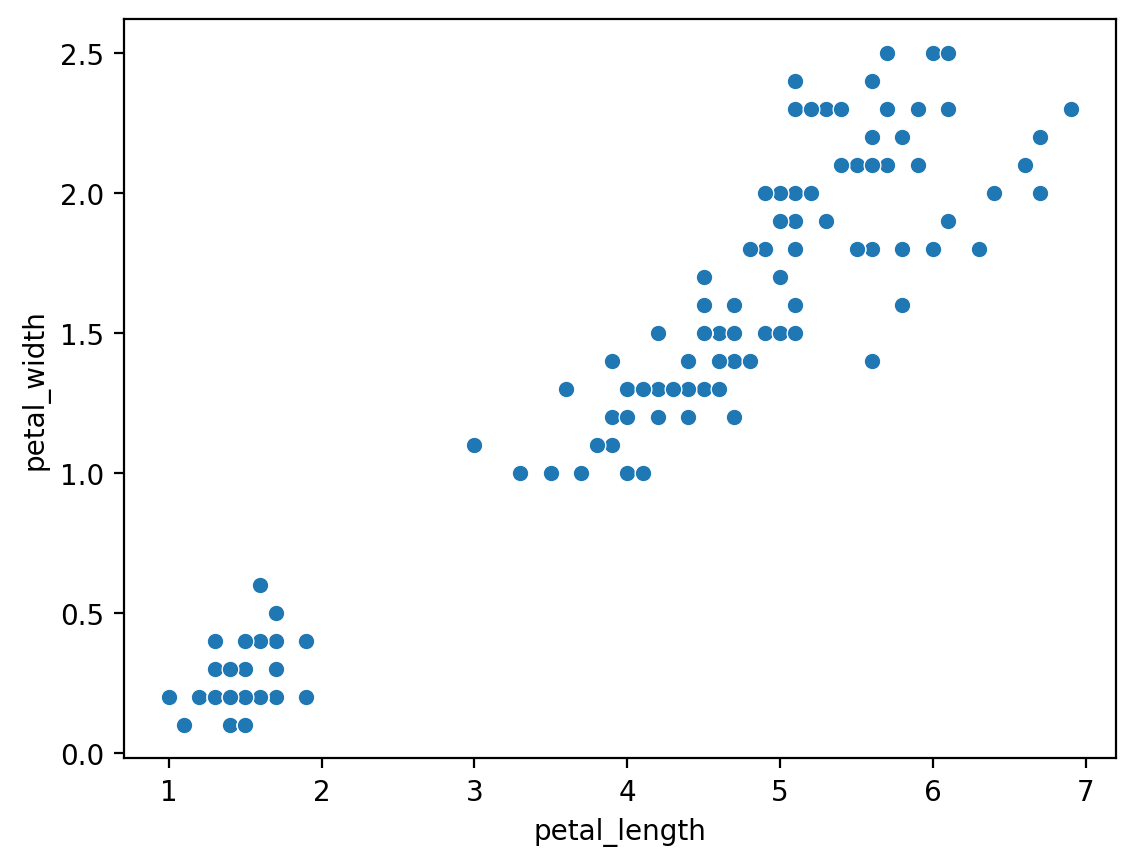

In [25]:
sns.scatterplot(data = data,x='petal_length',y='petal_width')

In [26]:
rx=np.random.uniform(1,7,3)
rx

array([1.89102753, 1.06910399, 2.36767337])

In [27]:
ry=np.random.uniform(0,2.5,3)
ry

array([1.01723114, 2.28690172, 2.17433036])

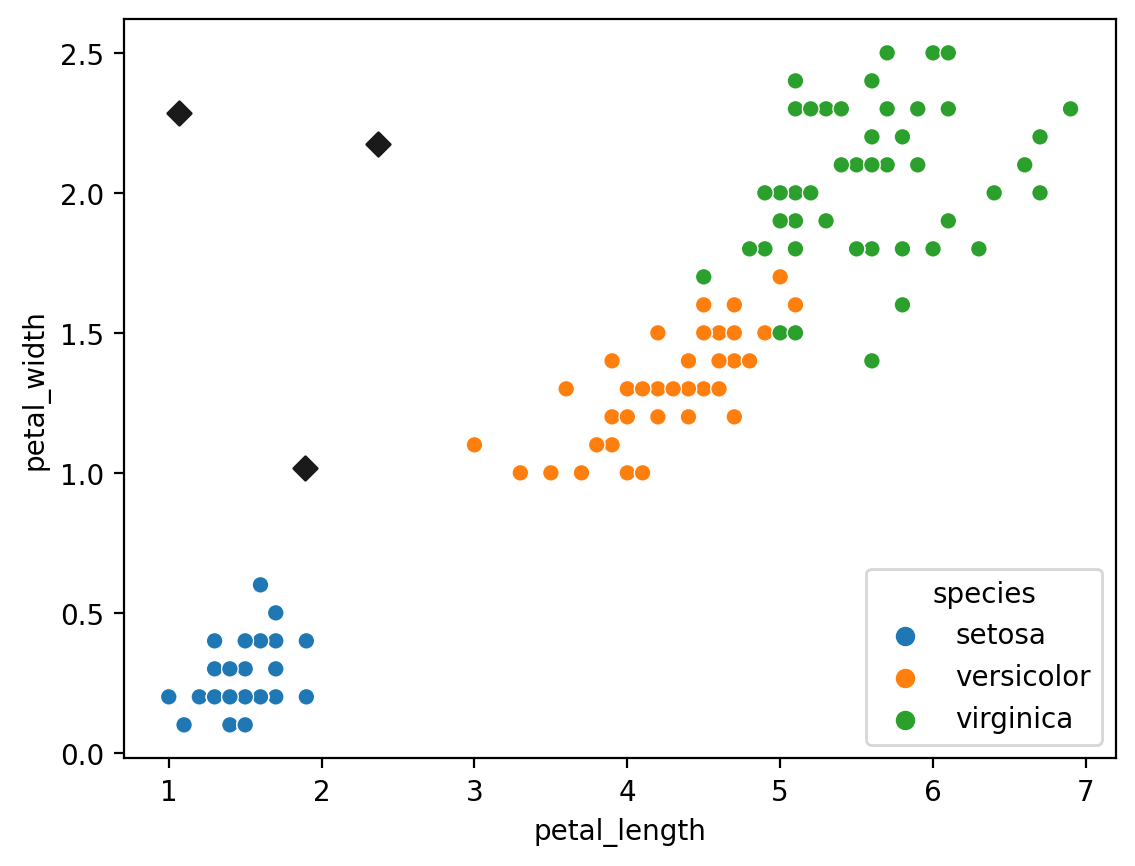

In [28]:
sns.scatterplot(data = data,x='petal_length',y='petal_width',hue='species')
plt.scatter(rx,ry,color='.1',marker='D')

In [29]:
from sklearn.cluster import KMeans

In [30]:
model = KMeans(n_clusters=3)
model

KMeans(n_clusters=3)

In [31]:
X=data[['petal_length','petal_width']]
model.fit(X)

KMeans(n_clusters=3)

In [32]:
model.cluster_centers_

array([[4.26923077, 1.34230769],
       [1.464     , 0.244     ],
       [5.59583333, 2.0375    ]])

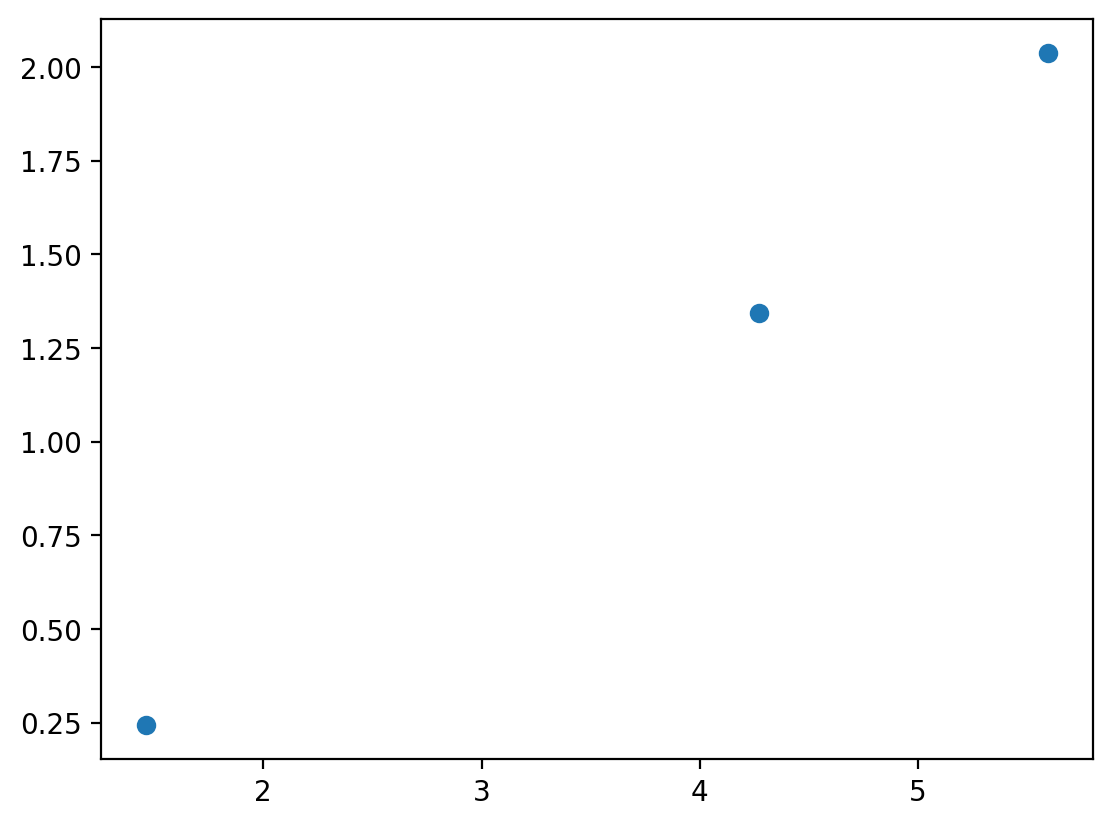

In [33]:
plt.scatter(model.cluster_centers_[:,0],model.cluster_centers_[:,1])

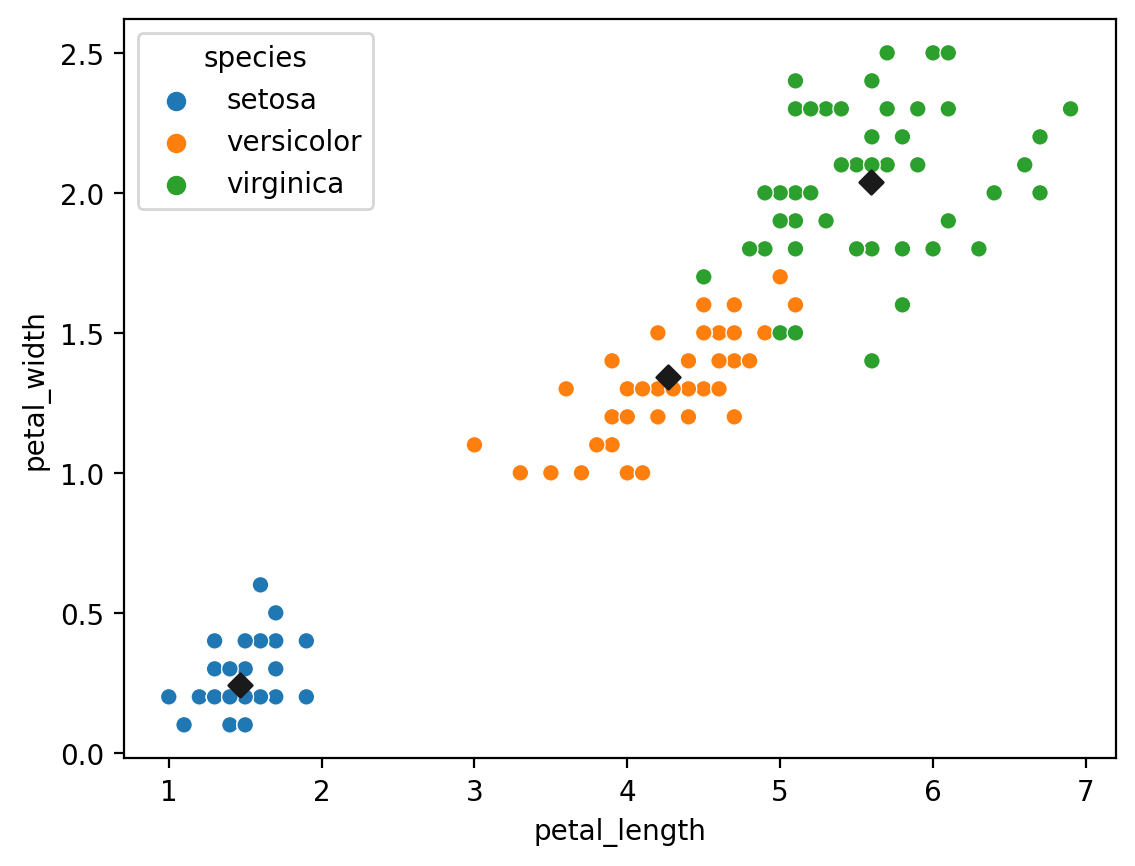

In [34]:
sns.scatterplot(data = data,x='petal_length',y='petal_width',hue='species')
plt.scatter(model.cluster_centers_[:,0],model.cluster_centers_[:,1],color='.1',marker='D')

In [35]:
model.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [36]:
data['cluster']=model.labels_

In [37]:
data

,sepal_length,sepal_width,petal_length,petal_width,species,cluster
0,5.1,3.5,1.4,0.2,setosa,1
1,4.9,3.0,1.4,0.2,setosa,1
2,4.7,3.2,1.3,0.2,setosa,1
3,4.6,3.1,1.5,0.2,setosa,1
4,5.0,3.6,1.4,0.2,setosa,1
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,2
146,6.3,2.5,5.0,1.9,virginica,2
147,6.5,3.0,5.2,2.0,virginica,2
148,6.2,3.4,5.4,2.3,virginica,2


In [38]:
pd.crosstab(data['species'],data['cluster'])

cluster,0,1,2
species,,,
setosa,0,50,0
versicolor,48,0,2
virginica,4,0,46


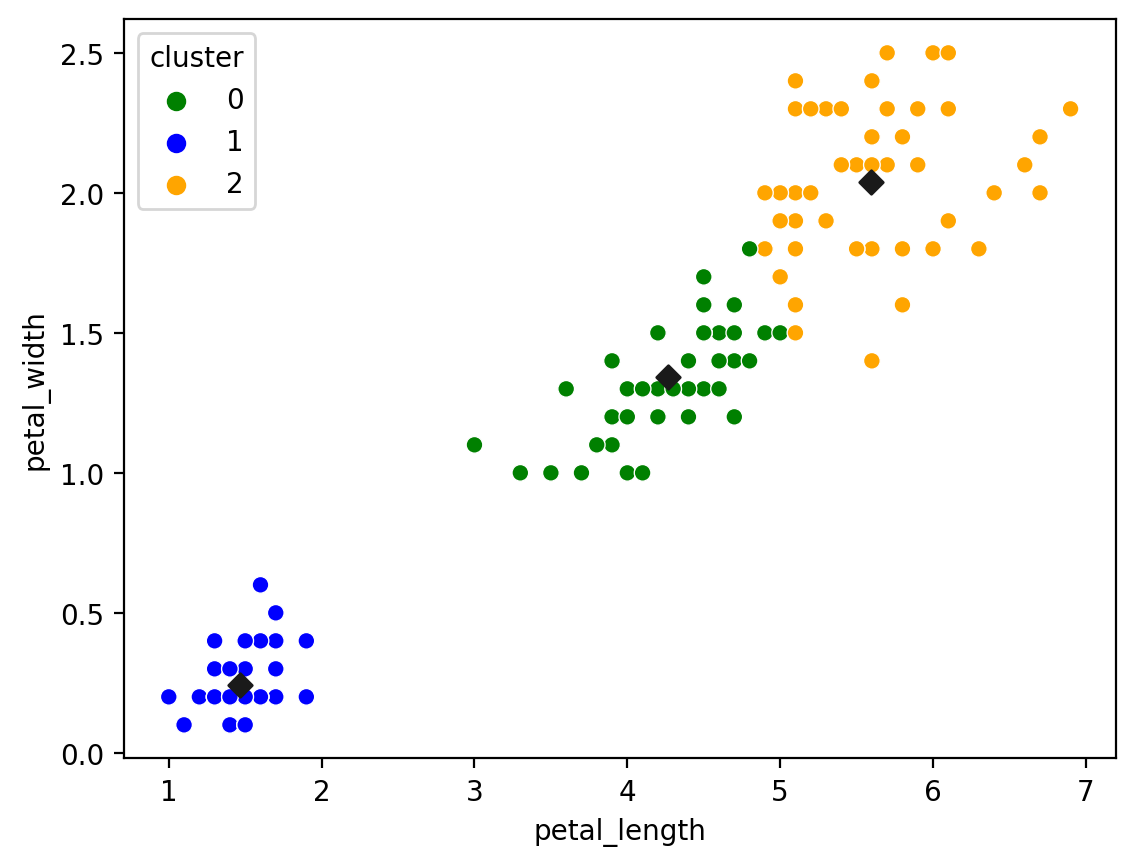

In [40]:
sns.scatterplot(data = data,x='petal_length',y='petal_width',hue='cluster',,palette=['green','blue','orange'])
plt.scatter(model.cluster_centers_[:,0],model.cluster_centers_[:,1],color='.1',marker='D')

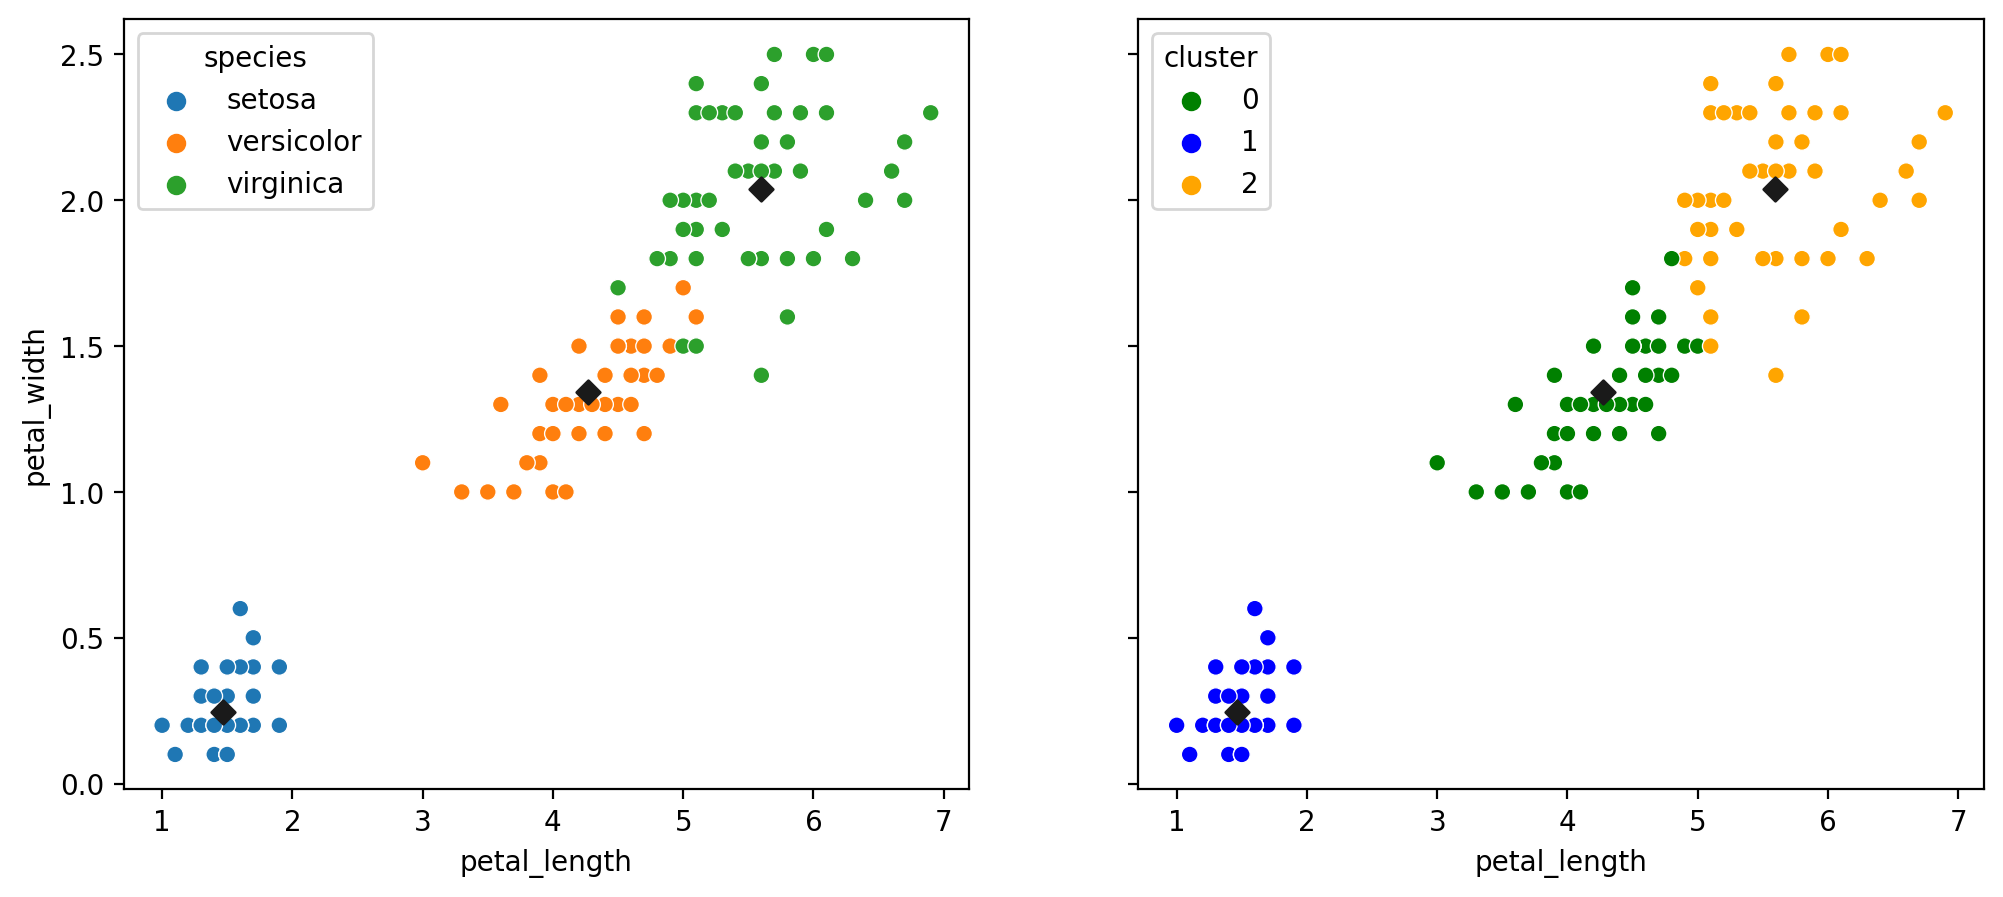

In [41]:
fig,ax=plt.subplots(1,2,figsize=(12,5),sharey=True,sharex=True)
X1=sns.scatterplot(data = data,x='petal_length',y='petal_width',hue='species',ax=ax[0])
X1.scatter(model.cluster_centers_[:,0],model.cluster_centers_[:,1],color='.1',marker='D')
X2=sns.scatterplot(data = data,x='petal_length',y='petal_width',hue='cluster',palette=['green','blue','orange'],ax=ax[1])
X2.scatter(model.cluster_centers_[:,0],model.cluster_centers_[:,1],color='.1',marker='D')